In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
from constants import *

###  Agile Octopus London Home Electricity Prices, pounds per kilowatt-hour
Source: [My Smart Energy](https://mysmartenergy.uk/Download-Data/London)

If you have your half hourly consumption data from your smart meter you can use this Agile Octopus Prices file to check what your bill would be with this tariff. Both Local (including British Summer Time) and UTC (GMT) times are shown, please choose the correct column when matching to your consumption data. Prices are shown both with and without VAT added. When comparing bills please also note the daily standing charges.

#### Each 24 hour day would have two half hour measurements, so 48 data points in a day 


In [2]:
half_hourly_prices = pd.read_csv(f"{DATA_FOLDER}/Agile_Octopus_C_London-AGILE-22-07-22.csv")
half_hourly_prices.head()


,Valid_From_UTC,Valid_To_UTC,Valid_From_Local,Valid_To_Local,Price_Inc_VAT,Price_Ex_VAT
0,9/29/22 4:30,9/29/22 5:00,9/29/22 5:30,9/29/22 6:00,38.38,36.55
1,9/29/22 5:00,9/29/22 5:30,9/29/22 6:00,9/29/22 6:30,37.80,36.00
2,9/29/22 5:30,9/29/22 6:00,9/29/22 6:30,9/29/22 7:00,54.85,52.24
3,9/29/22 6:00,9/29/22 6:30,9/29/22 7:00,9/29/22 7:30,48.38,46.08
4,9/29/22 6:30,9/29/22 7:00,9/29/22 7:30,9/29/22 8:00,55.00,52.38


In [3]:
len(half_hourly_prices)

31207

In [4]:
date_column= 'Valid_From_UTC'
data_column = 'Price_Ex_VAT'
half_hourly_prices[date_column] = pd.to_datetime(half_hourly_prices[date_column])


/var/folders/v1/24qfth9s4hd8jjscffmwx4yw0000gn/T/ipykernel_83363/238797309.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  half_hourly_prices[date_column] = pd.to_datetime(half_hourly_prices[date_column])


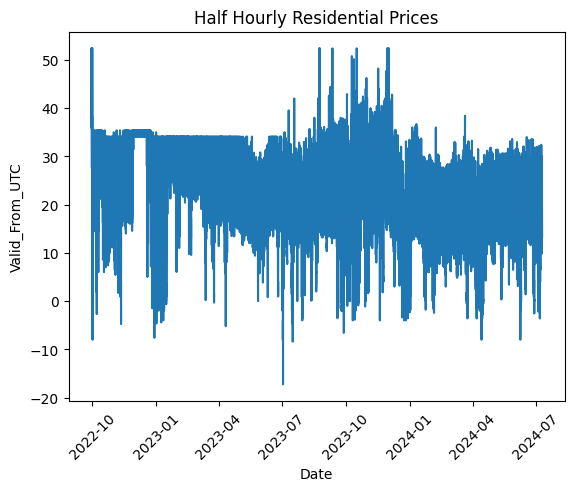

In [5]:
# Graph the daily average system price from 2020 to June 2024

plt.plot(half_hourly_prices[date_column], half_hourly_prices[data_column])
plt.xlabel('Date')
plt.ylabel(date_column)
plt.title('Half Hourly Residential Prices')
plt.xticks(rotation=45)
plt.show()


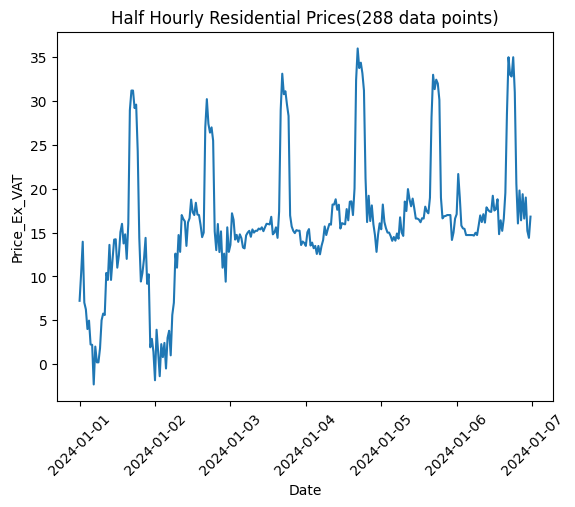

In [6]:
start_date = '2024-01-01'
end_date = '2024-01-07'

filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

plt.plot(filtered_data[date_column], filtered_data[data_column])
plt.xlabel('Date')
plt.ylabel(data_column)
plt.title(f'Half Hourly Residential Prices({num_data_points} data points)')
plt.xticks(rotation=45)
plt.show()

## One Week of Context

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/transformers/generation/logits_process.py:156: UserWarning: The operator 'aten::isin.Tensor_Tensor_out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  eos_token_mask = torch.isin(vocab_tensor, eos_token_id)


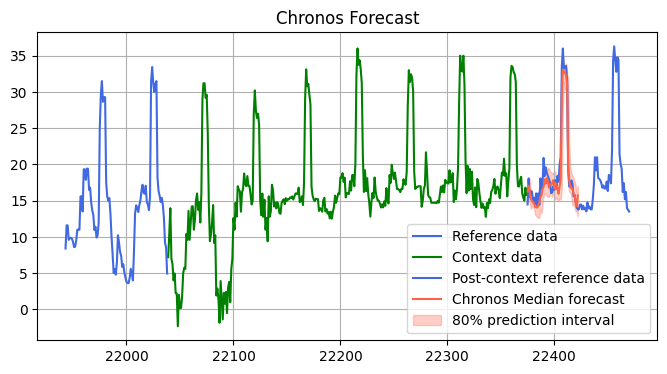

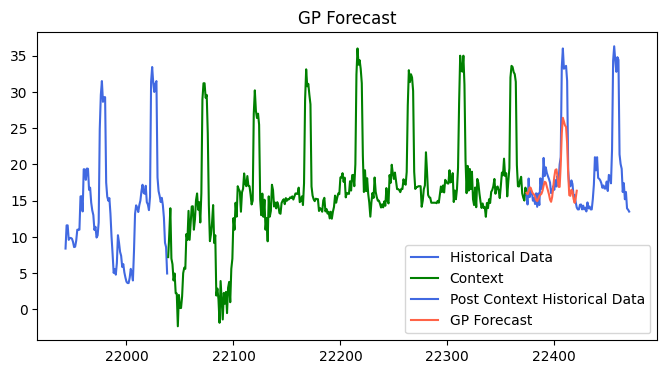

KeyboardInterrupt: 

In [7]:
start_date = '2024-01-01'
end_date = '2024-01-08'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length)

## Two Weeks of Context

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


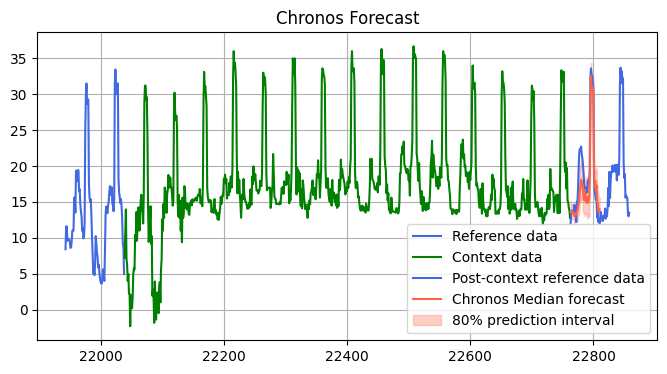

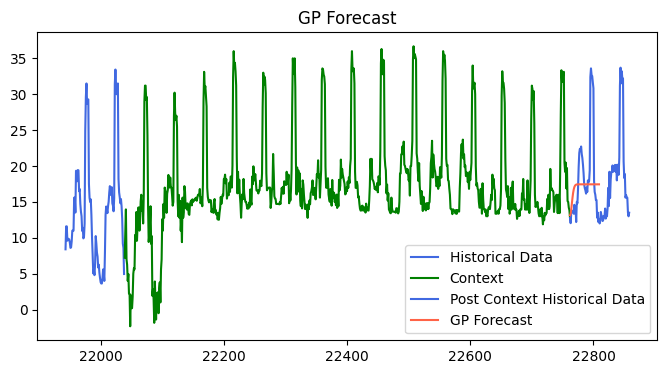

KeyboardInterrupt: 

In [8]:
start_date = '2024-01-01'
end_date = '2024-01-16'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length)

# Three Weeks of Context

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


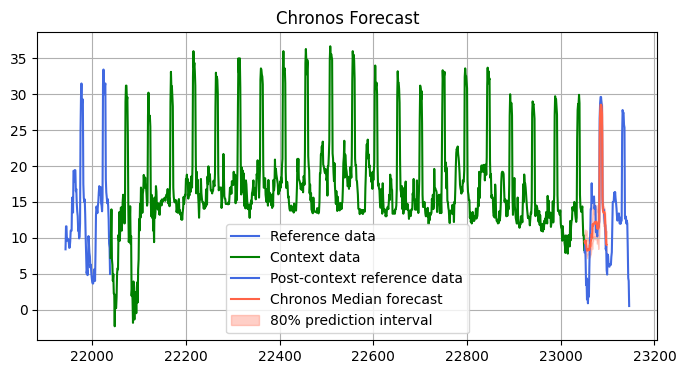

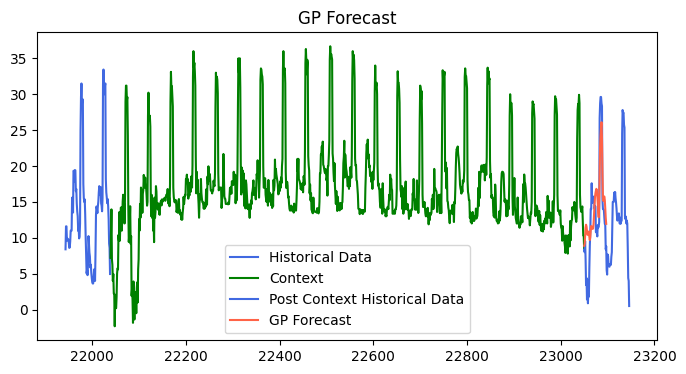

KeyboardInterrupt: 

In [9]:
start_date = '2024-01-01'
end_date = '2024-01-22'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length)

# One Month of Context

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


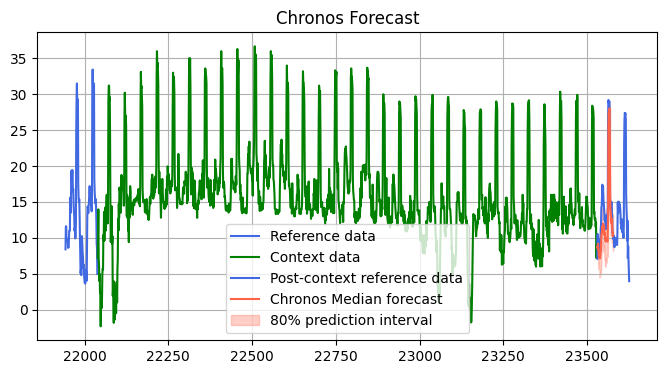

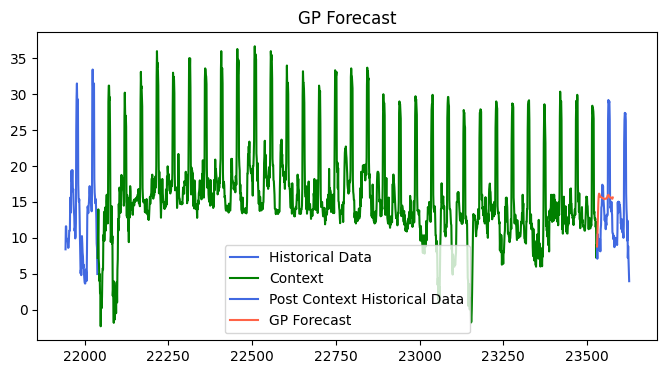

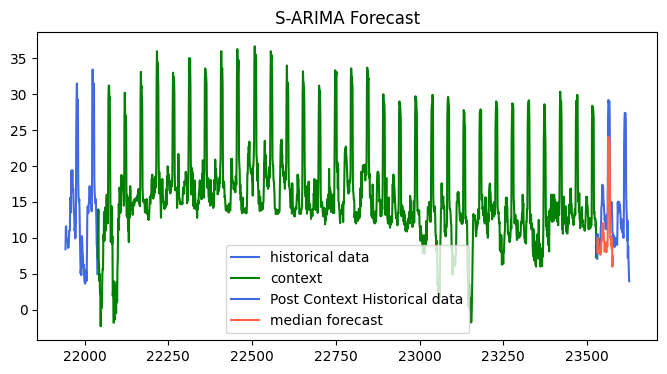

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


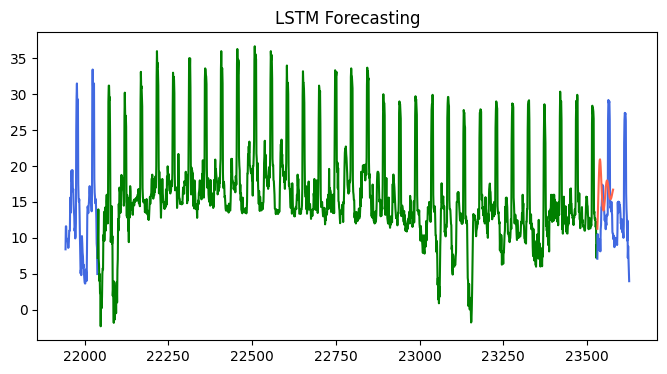


Results comparison for Price_Ex_VAT:

MSE
- chronos_mini MSE: 10.838591794566705
- gp MSE: 30.70519400607243
- sarima MSE: 15.373463177409299
- lstm MSE: 45.52546609872445
NMSE
- chronos_mini NMSE: 0.32746638545865686
- gp NMSE: 0.9276960592810406
- sarima NMSE: 0.4644784593891275
- lstm NMSE: 1.3754609558359043



In [10]:
start_date = '2024-01-01'
end_date = '2024-02-01'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length)